In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import seaborn as sns

In [11]:
x,y = make_moons(n_samples=400, noise=0.2, random_state=42)

In [5]:
df = pd.DataFrame({'x1': x[:, 0], 'x2': x[:, 1], 'y': y})

In [6]:
dataset = pd.DataFrame(df)

In [7]:
dataset

,x1,x2,y
0,-0.016988,0.397237,1
1,0.694613,-0.427054,1
2,0.847768,0.519621,0
3,0.095624,0.305824,1
4,0.097075,0.970429,0
...,...,...,...
395,0.429858,0.975407,0
396,-0.018152,0.971725,0
397,0.637550,-0.339747,1
398,1.811444,-0.242124,1


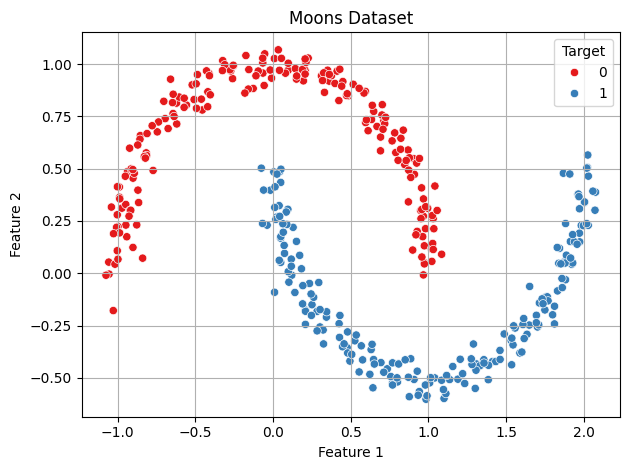

In [12]:
sns.scatterplot(data=dataset, x='x1', y='x2', hue='y', palette='Set1')
plt.title('Moons Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(title='Target', loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()

In [38]:
x_a = dataset.iloc[:,:-1]
y_a = dataset.iloc[:,-1]


In [39]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_a, y_a, test_size=0.2, random_state=42)

In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [41]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [42]:
print(f"Decision Tree Classifier Accuracy: {dt.score(x_test, y_test)*100:.2f}%")
print(f"Decision Tree Classifier Predictions: {dt.score(x_train, y_train)*100:.2f}%")

Decision Tree Classifier Accuracy: 95.00%
Decision Tree Classifier Predictions: 100.00%


In [52]:
sv = SVC(probability=True)
sv.fit(x_train, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,True
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [53]:
print(f"SVM Accuracy: {sv.score(x_test, y_test)*100:.2f}%")
print(f"SVM Accuracy: {sv.score(x_train, y_train)*100:.2f}%")

SVM Accuracy: 100.00%
SVM Accuracy: 100.00%


In [54]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)

,priors,None
,var_smoothing,1e-09


In [55]:
print("GaussianNB Accuracy: {:.2f}%".format(gnb.score(x_test, y_test) * 100))
print("GaussianNB Accuracy: {:.2f}%".format(gnb.score(x_train, y_train) * 100))

GaussianNB Accuracy: 83.75%
GaussianNB Accuracy: 87.81%


In [56]:
from sklearn.ensemble import VotingClassifier

In [61]:
li = [('dt1', DecisionTreeClassifier()), ('sv1', SVC()), ('gnb1', GaussianNB())]

In [66]:
vc = VotingClassifier(li)
vc.fit(x_train, y_train)

,estimators,"[('dt1', ...), ('sv1', ...), ...]"
,voting,'hard'
,weights,None
,n_jobs,None
,flatten_transform,True
,verbose,False
,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1


In [65]:
print("VotingClassifier Accuracy {:.2f}".format(vc.score(x_test, y_test) * 100))
print("VotingClassifier Accuracy {:.2f}".format(vc.score(x_train, y_train) * 100))


VotingClassifier Accuracy 83.75
VotingClassifier Accuracy 87.81


In [67]:
prd = {'Decision Tree': dt.predict(x_test),"SVM": sv.predict(x_test), "GaussianNB": gnb.predict(x_test), "Voting Classifier": vc.predict(x_test)}

In [68]:
prd

{'Decision Tree': array([0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
        0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
        1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1]),
 'SVM': array([0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
        0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
        1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1]),
 'GaussianNB': array([0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
        0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0]),
 'Voting Classifier': array([0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
        0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1

In [69]:
pd.DataFrame(prd)

,Decision Tree,SVM,GaussianNB,Voting Classifier
0,0,0,0,0
1,0,0,1,0
2,0,0,0,0
3,1,1,0,1
4,1,1,0,1
...,...,...,...,...
75,1,1,1,1
76,1,1,1,1
77,0,0,0,0
78,0,0,0,0
